In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('listings.csv', low_memory = False)

objective: predict prices and availability

places to look: 
https://github.com/chris-leonard/airbnb_exploratory_analysis/
https://github.com/amrithravindra/Airbnb-Exploratory-Analysis/blob/master/Amrith_Data_Challenge.ipynb

In [5]:
data.shape

(20677, 106)

In [44]:
#mapping column names to their dtype
dtypes = []
for column in data.columns: 
    dtypes.append(str(data[column].dtype))

dtypes_dict = dict(zip(list(data.columns), dtypes))

In [45]:
#check the main predictor
dtypes_dict['price']

'float64'

In [43]:
data['price'] = [float(elem.replace('$', '').replace(',', '')) for elem in data.price]

correlation: 0.3181


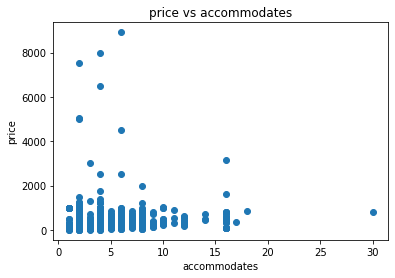

correlation: 1.0


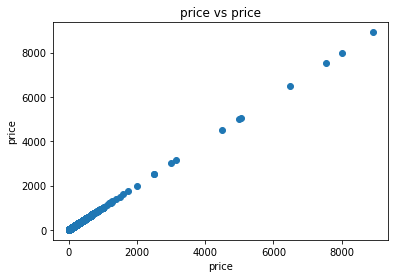

correlation: 0.144


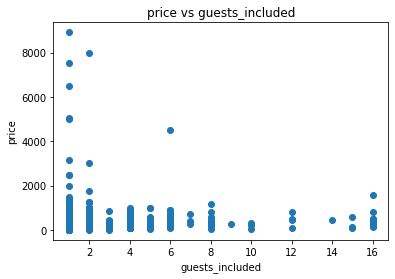

correlation: 0.1839


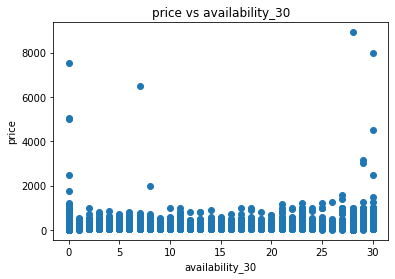

correlation: 0.1888


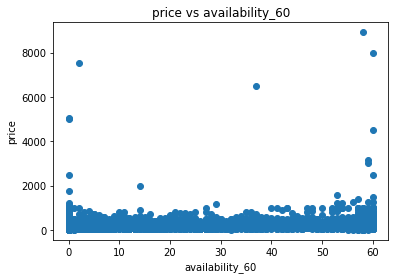

correlation: 0.1854


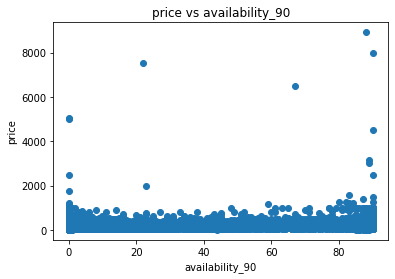

correlation: 0.1531


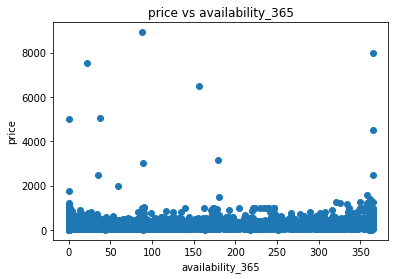

In [74]:
for column in data.columns: 
    if dtypes_dict[column] != 'object':
        y = data.price
        x = data[column]
        corr = numpy.corrcoef(x, y)[0,1]
        if abs(corr) > 0.1:
            print('correlation: ' + str(round(corr, 4)))
            plt.scatter(x, y)
            plt.ylabel('price')
            plt.xlabel(column)
            plt.title('price vs' + ' ' + column)
        
            plt.show()

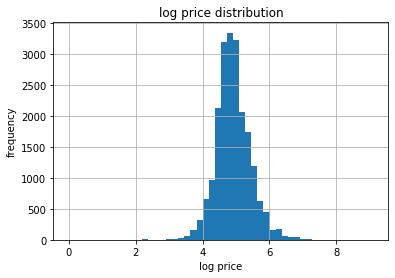

In [107]:
log_price = [np.log(value) if value!= 0 else np.log(value+1) for value in data.price]
pd.DataFrame({'log_price': log_price}).hist(bins = 50)
plt.title('log price distribution')
plt.ylabel('frequency')
plt.xlabel('log price')
plt.show()